In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Para Airtable:
import requests
import tqdm
from dotenv import load_dotenv
import os
load_dotenv()

True

### Bajamos los datos de Airtable:

In [2]:
def extraer_datos(TOKEN, BASE_ID, TABLE_ID):
    
    airtable_base_url = "https://api.airtable.com/v0"    
    # Headers
    headers = {"Authorization" : f"Bearer {TOKEN}", "Content-Type"  : "application/json"}
    endpoint_extraccion = f"{airtable_base_url}/{BASE_ID}/{TABLE_ID}"

    datos_tabla = []
    
    params = {}
    counter = 0
    while True:
        response = requests.get(url = endpoint_extraccion, headers = headers, params = params)
        print(f"response {counter}: {response.status_code}")

        data = response.json()
        datos_tabla.extend(data["records"])

        offset = data.get("offset")

        if offset == None:
            break

        params["offset"] = offset
        counter += 1
    
    # Genero un DataFrame a partir de los datos bajados:
    df_datos_airtable = pd.DataFrame([row["fields"] for row in datos_tabla])
    return df_datos_airtable

In [3]:
# Usuario:
TOKEN_1 = os.getenv("TOKEN_PROJECT_1")

# Base Airtable:
BASE_ID_1 = "appNWRaJssOqWSIXn"
BASE_ID_2 = "appX4sFWl2I3jKPEi"

# Tablas:
TABLA_1 = "tblv53ImCgSHYUzvi"
TABLA_2 = "tblaFkohcfFNOttG1"

In [4]:
df_mitad_1 = extraer_datos(TOKEN_1, BASE_ID_1, TABLA_1)
df_mitad_2 = extraer_datos(TOKEN_1, BASE_ID_2, TABLA_2)

response 0: 200
response 1: 200
response 2: 200
response 3: 200
response 4: 200
response 5: 200
response 6: 200
response 7: 200
response 8: 200
response 9: 200
response 10: 200
response 11: 200
response 12: 200
response 13: 200
response 14: 200
response 15: 200
response 16: 200
response 17: 200
response 18: 200
response 19: 200
response 20: 200
response 21: 200
response 22: 200
response 23: 200
response 24: 200
response 25: 200
response 26: 200
response 27: 200
response 28: 200
response 29: 200
response 30: 200
response 31: 200
response 32: 200
response 33: 200
response 34: 200
response 35: 200
response 36: 200
response 37: 200
response 38: 200
response 39: 200
response 40: 200
response 41: 200
response 42: 200
response 43: 200
response 44: 200
response 45: 200
response 46: 200
response 47: 200
response 48: 200
response 49: 200
response 0: 200
response 1: 200
response 2: 200
response 3: 200
response 4: 200
response 5: 200
response 6: 200
response 7: 200
response 8: 200
response 9: 200


In [5]:
df = pd.concat([df_mitad_1, df_mitad_2], ignore_index=True)

In [6]:
# Cambio las columnas númericas a tipo float:

In [7]:
columnas_num = df.columns[5:]
for col in columnas_num:
    df[col] = df[col].apply(lambda x: float(x))

In [8]:
df.head(3)

tienda categoria                  marca                      nombre  \
0  perfumeriacom     mujer  giorgio beverly hills                           g   
1    perfumes24h     mujer                lattafa  sheikh al shuyukh khusoosi   
2    perfumes24h     mujer                  armaf        tres jour pour femme   

            tipo  precio_sin_desc  descuento  precio_con_desc  valoracion  \
0  eau de parfum             40.0      57.63            16.95         5.0   
1  eau de parfum             29.0      51.90            13.95         5.0   
2  eau de parfum             32.0      40.78            18.95         5.0   

   num_valoraciones  
0               1.0  
1               2.0  
2               1.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tienda            9871 non-null   object 
 1   categoria         9871 non-null   object 
 2   marca             9871 non-null   object 
 3   nombre            9871 non-null   object 
 4   tipo              9871 non-null   object 
 5   precio_sin_desc   9871 non-null   float64
 6   descuento         9871 non-null   float64
 7   precio_con_desc   9871 non-null   float64
 8   valoracion        7598 non-null   float64
 9   num_valoraciones  7598 non-null   float64
dtypes: float64(5), object(5)
memory usage: 771.3+ KB


In [10]:
df.describe()

precio_sin_desc    descuento  precio_con_desc   valoracion  \
count      9871.000000  9871.000000      9871.000000  7598.000000   
mean         77.298476    36.138326        49.135099     4.745576   
std          50.962911    19.886125        39.384645     1.552190   
min           1.000000     0.000000         1.000000     1.000000   
25%          46.000000    25.000000        24.950000     4.500000   
50%          73.000000    39.930000        40.950000     5.000000   
75%         100.000000    50.030000        64.950000     5.000000   
max        1999.800000    87.000000      1381.500000    45.000000   

       num_valoraciones  
count       7598.000000  
mean          12.784154  
std          118.295384  
min            1.000000  
25%            1.000000  
50%            2.000000  
75%            5.000000  
max         8180.000000

In [11]:
df["tienda"].unique()

array(['perfumeriacom', 'perfumes24h', 'primor', 'paco', 'druni',
       'notino', 'douglas'], dtype=object)

# Análisis de las princincipales perfumerias online

Este estudio se ha centrado en las siete perfumerias online de España con mayor número de visitas al mes. A continuación se muestran de mayor a menor número de visitas:
- *Druni*, con *2.300.000* visitas al mes: https://www.druni.es/
- *Primor*, con *1.994.000* visitas al mes: https://www.primor.eu/es_es/
- *Douglas*, con *735.000* visitas al mes: https://www.douglas.es/es
- *Notino*, con *447.000* visitas al mes: https://www.notino.es/
- *Paco Perfumerías*, con *242.500* visitas al mes: https://www.pacoperfumerias.com/
- *Perfumes 24 horas*, con *198.000* visitas al mes: https://perfumes24h.com/
- *Perfumeria.com*, con *178.000* visitas al mes: https://perfumeria.com/

Se han recabado los siguientes datos para cada una de las tiendas online:
- Categoría: Se presentan en dos, para hombre y para mujer.
- Marca: Se recoge cada una de las marcas vendidas por cada tienda.
- Nombre: El nombre de cada producto en la página web.
- Tipo: Se han analizado los principales tipos de productos vendidos, tales como: eau de cologne, eau de toilette, eau de parfum y parfum.
- Precios: Se toman los precios con o sin descuento de cada producto, así como su porcentaje de descuento.
- Valoración: Puntuación media del 0 al 5 que recibe un producto en base al número de valoraciones.
- Número de valoraciones: Cantidad de valoraciones de un producto por los clientes.

## Objetivos del análisis:
- Precisar la orientación de mercado.
- Detectar las marcas y productos más populares entre los consumidores.
- Esclarecer las principales diferencias de precios y descuentos, tanto de marcas como de productos populares entre las tiendas.
- Determinar las tiendas con una mayor actividad de valoración.
- Explorar si existen correlaciones en precios, descuentos y valoraciones de las marcas TOP 5.




### 1- Análisis por categoría

#### 1.1- Distribución de la cantidad de productos para hombres y mujeres, en total y por tienda:

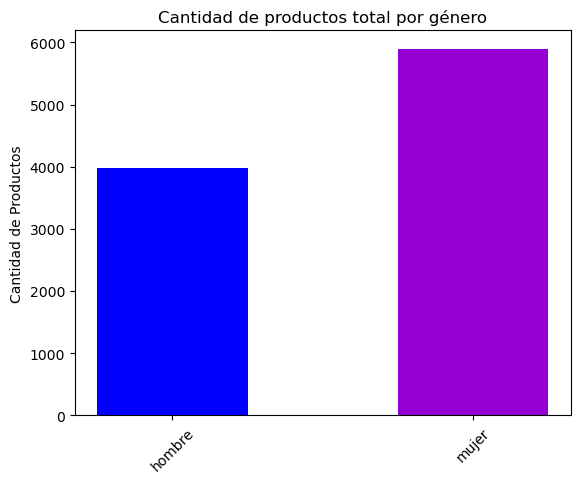

In [12]:
productos_por_genero_1 = df.groupby(['categoria'])['nombre'].count().to_frame().reset_index()

# Definimos los colores para cada categoría:
colores_por_categoria = {'hombre': 'blue', 'mujer': 'darkviolet'}

# Generamos el gráfico de barras:
plt.figure(figsize=(6.4, 5))
for categoria, color in colores_por_categoria.items():
    subset = productos_por_genero_1[productos_por_genero_1['categoria'] == categoria]
    plt.bar(subset['categoria'], subset['nombre'], width=0.5, color=color)

plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de productos total por género')
plt.xticks(range(len(productos_por_genero_1["categoria"].values)), productos_por_genero_1["categoria"].values, rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

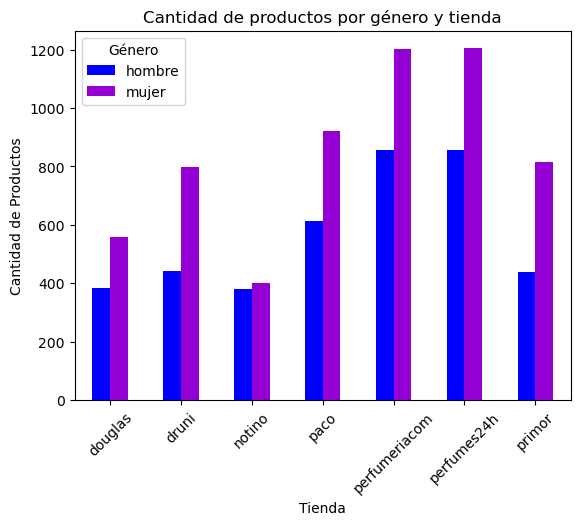

In [13]:
# Agrupamos los datos por tienda y categoria y calculamos la cantidad de productos por género:

productos_por_genero_2 = df.groupby(['tienda', 'categoria'])['nombre'].count().sort_values().unstack()
colors = ['blue', 'darkviolet']

# Creamos un gráfico de barras:
plt.figure(figsize=(12, 6))
productos_por_genero_2.plot(kind='bar', color=colors)
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos')
plt.title('Cantidad de productos por género y tienda')
plt.xticks(range(len(productos_por_genero_2.index)), productos_por_genero_2.index, rotation=45)
plt.legend(title='Género')
plt.show()

Se observa claramente como la orientación de mercado se dirige hacia el público femenino, teniendo una mayor cantidad de productos.<br>
<br>
#### 1.2- Estudio del precio medio por tipo de producto en cada una de las categorías.
- Comenzaremos estudiando el precio medio sin descuento:

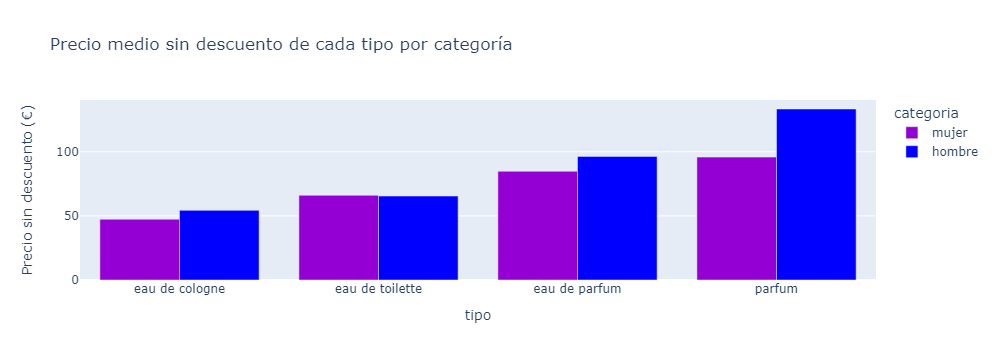

In [14]:
tipos_precio_genero_1 = df.groupby(["categoria","tipo"])["precio_sin_desc"].mean().to_frame().reset_index().sort_values(by="precio_sin_desc")
colors = ['darkviolet', "blue"]
labels = {'Tipo': 'Tipo de producto', 'precio_sin_desc': 'Precio sin descuento (€)'}
titulo = 'Precio medio sin descuento de cada tipo por categoría'
px.bar(data_frame= tipos_precio_genero_1, x= "tipo", y= "precio_sin_desc", color= "categoria", color_discrete_sequence= colors, labels= labels, title= titulo, barmode= "group")

- A continuación mostraremos el precio medio con descuento:

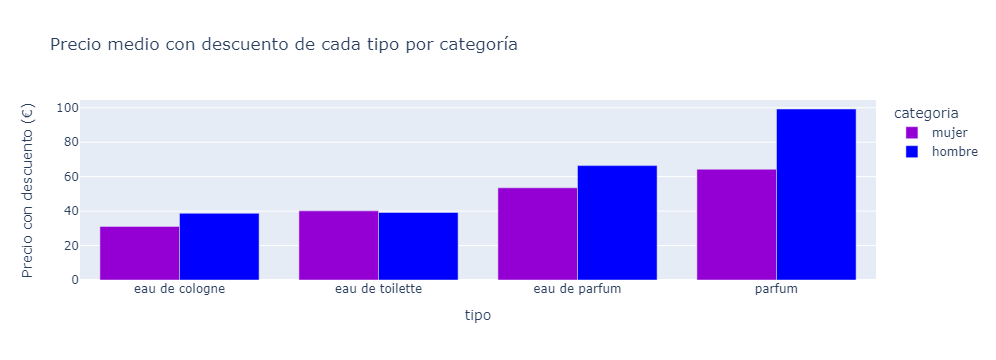

In [15]:
tipos_precio_genero_2 = df.groupby(["categoria","tipo"])["precio_con_desc"].mean().to_frame().reset_index().sort_values(by="precio_con_desc")
colors = ['darkviolet', "blue"]
labels = {'Tipo': 'Tipo de producto', 'precio_con_desc': 'Precio con descuento (€)'}
titulo = 'Precio medio con descuento de cada tipo por categoría'
px.bar(data_frame= tipos_precio_genero_2, x= "tipo", y= "precio_con_desc", color= "categoria", color_discrete_sequence= colors, labels= labels, title= titulo, barmode= "group")

Se descubre como el precio medio, tanto con descuento como sin descuento, es mayor para el género masculino. Esto puede deberse a un menor número de compras por parte del público masculino.

#### 1.3- Evaluación del descuento promedio en los productos por categoría.

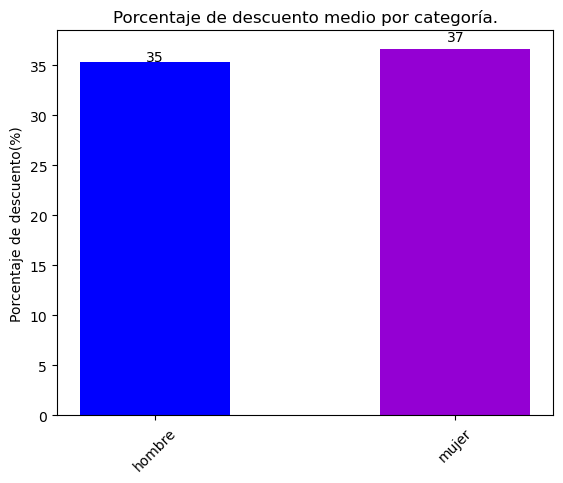

In [16]:
descuento_por_genero = df.groupby(['categoria'])['descuento'].mean().to_frame().reset_index()

# Definimos los colores para cada categoría:
colores_por_categoria = {'hombre': 'blue', 'mujer': 'darkviolet'}

# Generamos el gráfico de barras:
plt.figure(figsize=(6.4, 5))
for categoria, color in colores_por_categoria.items():
    subset = descuento_por_genero[descuento_por_genero['categoria'] == categoria]
    plt.bar(subset['categoria'], subset['descuento'], width=0.5, color=color)

plt.ylabel('Porcentaje de descuento(%)')
plt.title('Porcentaje de descuento medio por categoría.')
plt.xticks(range(len(descuento_por_genero["categoria"].values)), descuento_por_genero["categoria"].values, rotation=45)

# Agregamos el porcentaje de descuento:

porcentajes = descuento_por_genero["descuento"].apply(lambda x: round(x))
for i, v in enumerate(porcentajes):
    plt.text(i , v +0.1, str(v), ha='center', va='bottom')

plt.show()

El resultado nos muestra que no hay una diferencia significativa de descuento entre categorías, siendo el mayor descuento promedio para la categoría mujer.

#### 1.4- Determinación del TOP 5 de marcas más valorados en cada categoría.<br>
Para ello tomaremos las 5 marcas con mayor número de valoraciones y representaremos con gradiente de color la puntuación media de la marca.<br>
- Para el público masculino las marcas más valoradas son las siquientes:

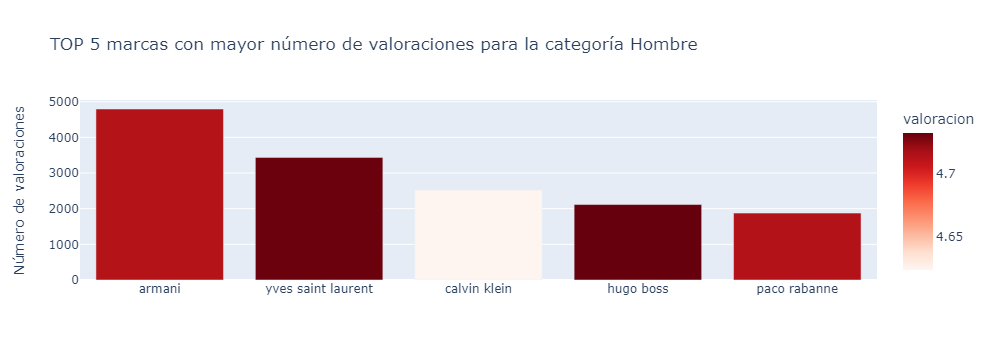

In [17]:
mask_hombres = (df["categoria"] == "hombre")
df_top5_masc = df[mask_hombres].groupby(by="marca").agg({"valoracion": "mean", "num_valoraciones": "sum"}).reset_index().sort_values(by= "num_valoraciones", ascending= False).head(5)
df_top5_masc["valoracion"] = df_top5_masc["valoracion"].apply(lambda x: round(x,3))

labels_14_h = {'marca': '', 'num_valoraciones': 'Número de valoraciones'}
titulo_14_h = 'TOP 5 marcas con mayor número de valoraciones para la categoría Hombre'

px.bar(data_frame= df_top5_masc, x= "marca", y= "num_valoraciones", color= "valoracion", color_continuous_scale= "reds", labels= labels_14_h, title= titulo_14_h)

- Para el público femenino las marcas más valoradas son las siquientes:

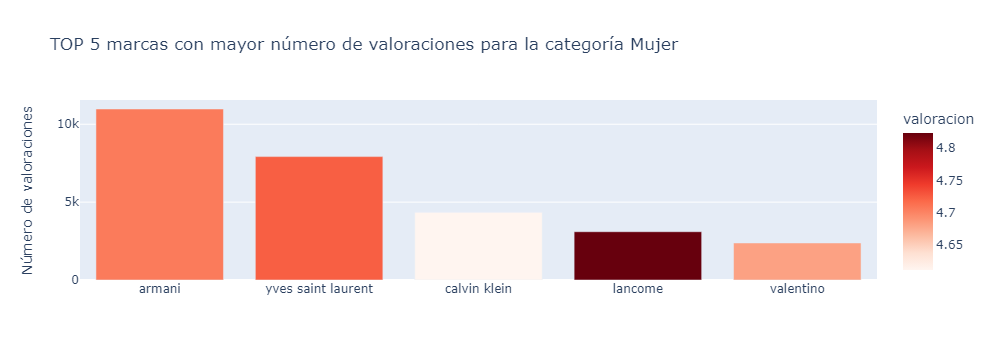

In [18]:
mask_mujeres = (df["categoria"] == "mujer")
df_top5_fem = df[mask_mujeres].groupby(by="marca").agg({"valoracion": "mean", "num_valoraciones": "sum"}).reset_index().sort_values(by= "num_valoraciones", ascending= False).head(5)
df_top5_fem["valoracion"] = df_top5_fem["valoracion"].apply(lambda x: round(x,3))

labels_14_m = {'marca': '', 'num_valoraciones': 'Número de valoraciones'}
titulo_14_m = 'TOP 5 marcas con mayor número de valoraciones para la categoría Mujer'

px.bar(data_frame= df_top5_fem, x= "marca", y= "num_valoraciones", color= "valoracion", color_continuous_scale= "reds", labels= labels_14_m, title= titulo_14_m)

#### 1.5- Determinación del TOP 3 de productos más valorados en cada categoría.<br>

- Para el público masculino las marcas más valoradas son las siquientes:

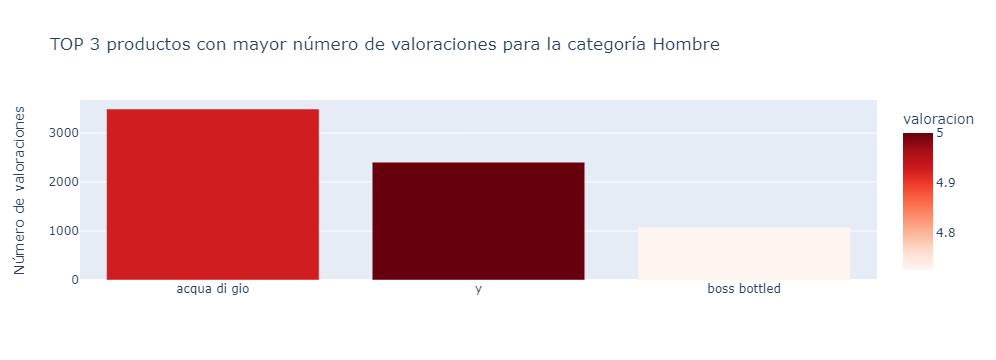

In [19]:
df_top3_masc = df[mask_hombres].groupby(by= ["marca", "nombre"]).agg({"valoracion": "mean", "num_valoraciones": "sum"}).reset_index().sort_values(by= "num_valoraciones", ascending= False).head(3)
df_top3_masc["valoracion"] = df_top3_masc["valoracion"].apply(lambda x: round(x,3))

labels_15_h = {'nombre': 'Nombre', 'num_valoraciones': 'Número de valoraciones'}
titulo_15_h = 'TOP 3 productos con mayor número de valoraciones para la categoría Hombre'

px.bar(data_frame= df_top3_masc, x= "nombre", y= "num_valoraciones", color= "valoracion", color_continuous_scale= "reds", labels= labels_15_h, title= titulo_15_h, hover_data = ["marca", "valoracion"]
      ).update_xaxes(title_text='', showticklabels= True)

- Para el público femenino las marcas más valoradas son las siquientes:

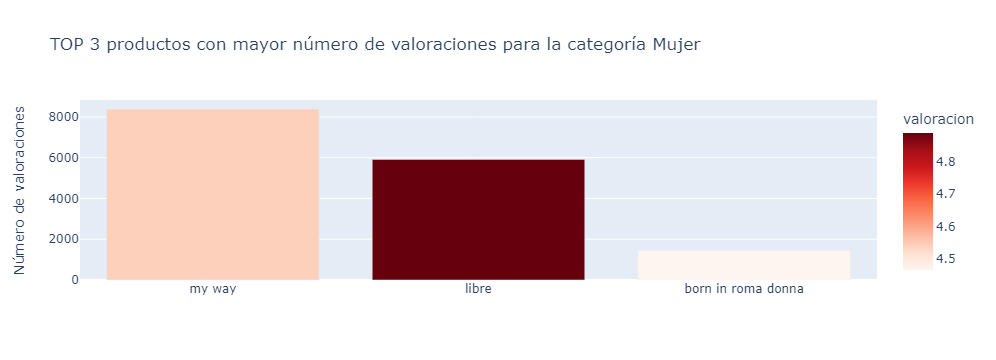

In [20]:
df_top3_fem = df[mask_mujeres].groupby(by= ["marca", "nombre"]).agg({"valoracion": "mean", "num_valoraciones": "sum"}).reset_index().sort_values(by= "num_valoraciones", ascending= False).head(3)
df_top3_fem["valoracion"] = df_top3_fem["valoracion"].apply(lambda x: round(x,3))

labels_15_m = {'nombre': 'Nombre', 'num_valoraciones': 'Número de valoraciones'}
titulo_15_m = 'TOP 3 productos con mayor número de valoraciones para la categoría Mujer'

px.bar(data_frame= df_top3_fem, x= "nombre", y= "num_valoraciones", color= "valoracion", color_continuous_scale= "reds", labels= labels_15_m, title= titulo_15_m, hover_data = ["marca", "valoracion"]
      ).update_xaxes(title_text='', showticklabels= True)

### 2- Análisis por tienda

#### 2.1- Estudio de los precios en cada una de las tiendas.

- Se toman los precios sin descuento para hacer una comparación objetiva del precio de los productos por tienda:

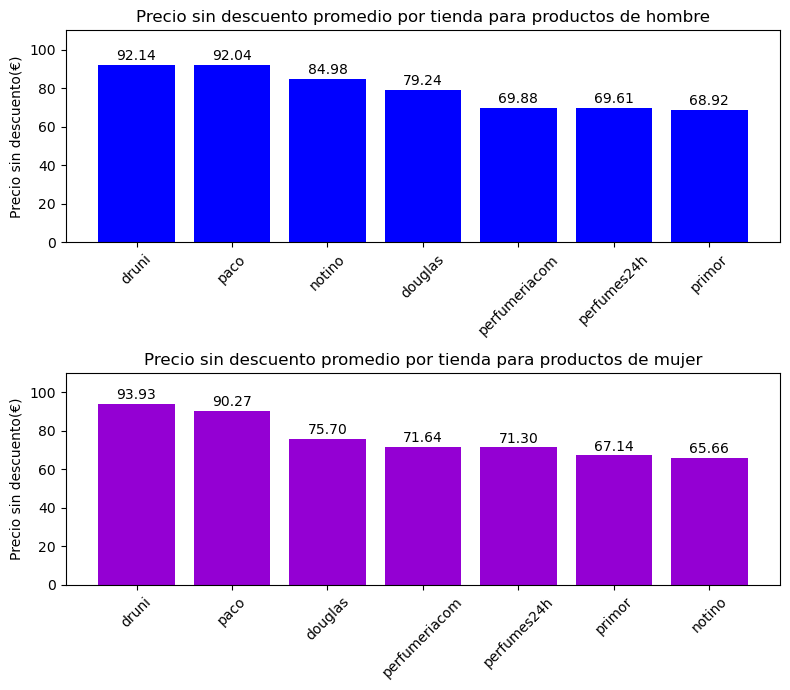

In [21]:
productos_hombres = df[df['categoria'] == 'hombre']
productos_mujeres = df[df['categoria'] == 'mujer']

promedio_preciosin_hombres_por_tienda = productos_hombres.groupby('tienda')['precio_sin_desc'].mean().sort_values(ascending=False)
promedio_preciosin_mujeres_por_tienda = productos_mujeres.groupby('tienda')['precio_sin_desc'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=2, figsize=(8, 7))
axes[0].bar(promedio_preciosin_hombres_por_tienda.index, promedio_preciosin_hombres_por_tienda, color='blue')
axes[0].set_ylabel('Precio sin descuento(€)')
axes[0].set_title('Precio sin descuento promedio por tienda para productos de hombre')
axes[1].bar(promedio_preciosin_mujeres_por_tienda.index, promedio_preciosin_mujeres_por_tienda, color='darkviolet')
axes[1].set_xlabel('')
axes[1].set_ylabel('Precio sin descuento(€)')
axes[1].set_title('Precio sin descuento promedio por tienda para productos de mujer')
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

for ax in axes:
    for i, v in enumerate(ax.patches):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 1, f'{v.get_height():.2f}', ha='center', va='bottom')
        
for ax in axes:
    ax.set_ylim(top=110)

plt.tight_layout()
plt.show()

Se observa que, para productos de mujer, los menores precios se presentan en la tienda de Notino, mientras que para hombre en Primor. Destacar que para ambos casos la tienda con mayores precios es Druni, con una diferencia aproximada con respecto a las más baratas de 25€.

- Antes de analizar el precio promedio por tipo de producto en cada tienda, hagámonos una idea general de como están distribuídos estos precios por tipo:

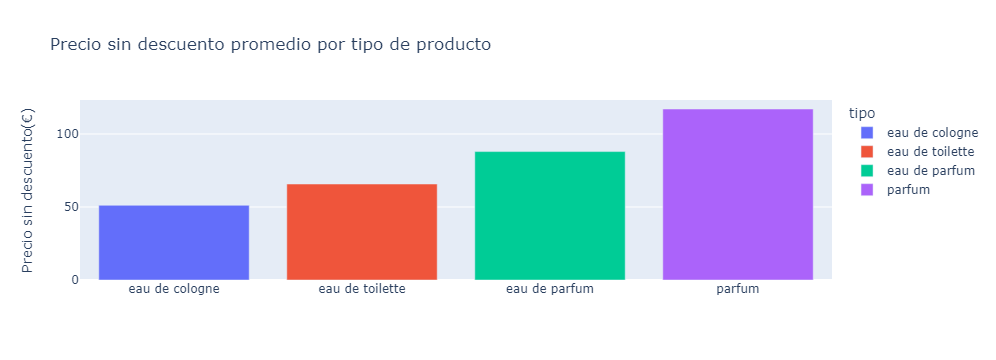

In [22]:
df_precio_tipo = df.groupby("tipo", as_index = False).agg({"precio_sin_desc" : "mean"}).sort_values("precio_sin_desc")

labels_21 = {'precio_sin_desc': 'Precio sin descuento(€)'}
titulo_21 = 'Precio sin descuento promedio por tipo de producto'

fig_1 = px.bar(data_frame = df_precio_tipo, x = "tipo", y = "precio_sin_desc", color = "tipo", labels= labels_21, title= titulo_21)
fig_1.update_xaxes(title_text='', showticklabels= True)

Como cabía esperar, a mayor concentración de aceites esenciales, mayor precio del producto, siendo el de menor concentración la eau de cologne y el de mayor el parfum.

- Analicemos a continuación la diferencia de precios por tipo de producto en cada tienda:

##### Para la categoría hombre:

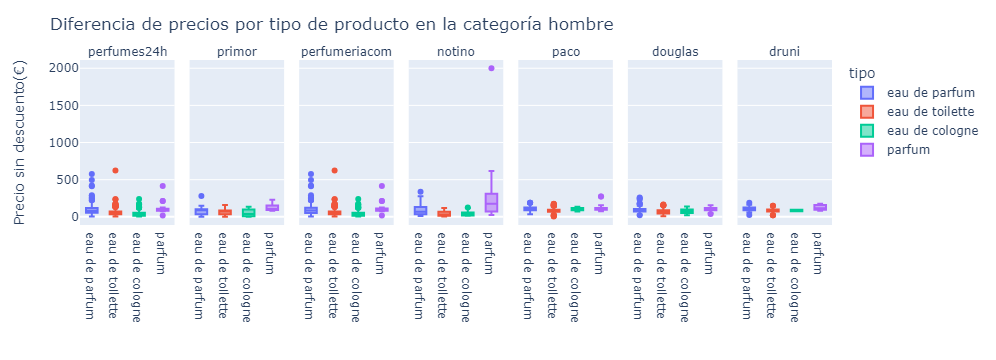

In [23]:
# Generamos un boxplot para cada tienda:
fig = px.box(data_frame=productos_hombres, x="tipo", y="precio_sin_desc", color="tipo", facet_col="tienda")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("tienda=")[1]))
fig.update_layout(title="Diferencia de precios por tipo de producto en la categoría hombre", yaxis_title="Precio sin descuento(€)")
fig.update_xaxes(title_text='', showticklabels=True)

fig.show()

Podemos observar como en algunas tiendas tenemos cierta cantidad de outliers. Vamos a eliminarlos para una posterior visualización:

In [24]:
def clean_outliers(df, columa):
    #Calculo el IQR:
    Q1, Q3 = np.percentile(df[columna], [25,75])
    IQR = Q3 - Q1

    # Vamos a sacar los outliers
    superior = Q3 + 1.5*IQR
    inferior = Q1 - 1.5*IQR    
    
    return inferior, superior

In [25]:
def elimina_outlier(df, tienda, columna):
    
    mask_tienda = (df["tienda"] == tienda)
    df_tienda = df[mask_tienda]
    
    tipos = df["tipo"].unique()
    col = columna
    
    # Tipos:
    mask_1 = (df["tipo"] == tipos[0])
    df_filtrado_1 = df_tienda[mask_1]
    inferior_1, superior_1 = clean_outliers(df_filtrado_1,col)    
    df_1 = df_filtrado_1[df_filtrado_1["precio_sin_desc"].between(inferior_1, superior_1)]
    
    mask_2 = (df["tipo"] == tipos[1])
    df_filtrado_2 = df_tienda[mask_2]
    inferior_2, superior_2 = clean_outliers(df_filtrado_2,col)    
    df_2 = df_filtrado_2[df_filtrado_2["precio_sin_desc"].between(inferior_2, superior_2)]
    
    mask_3 = (df["tipo"] == tipos[2])
    df_filtrado_3 = df_tienda[mask_3]
    inferior_3, superior_3 = clean_outliers(df_filtrado_3,col)    
    df_3 = df_filtrado_3[df_filtrado_3["precio_sin_desc"].between(inferior_3, superior_3)]
    
    mask_4 = (df["tipo"] == tipos[3])
    df_filtrado_4 = df_tienda[mask_4]
    inferior_4, superior_4 = clean_outliers(df_filtrado_4,col)    
    df_4 = df_filtrado_4[df_filtrado_4["precio_sin_desc"].between(inferior_4, superior_4)]
    
    
    
    # Tienda sin outliers en los tipos:    
    df_tienda_sin_out = pd.concat([df_1, df_2, df_3, df_4], ignore_index=False)   
    
    return df_tienda_sin_out

In [26]:
tiendas = productos_hombres["tienda"].unique()
columna = "precio_sin_desc"
df_1 = elimina_outlier(productos_hombres,tiendas[0], columna)
df_2 = elimina_outlier(productos_hombres,tiendas[1], columna)
df_3 = elimina_outlier(productos_hombres,tiendas[2], columna)
df_4 = elimina_outlier(productos_hombres,tiendas[3], columna)
df_5 = elimina_outlier(productos_hombres,tiendas[4], columna)
df_6 = elimina_outlier(productos_hombres,tiendas[5], columna)
df_7 = elimina_outlier(productos_hombres,tiendas[6], columna)
df_sin_outliers_masc = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:21: UserWarning:

Boolean Series key will be reindexed to match Dat

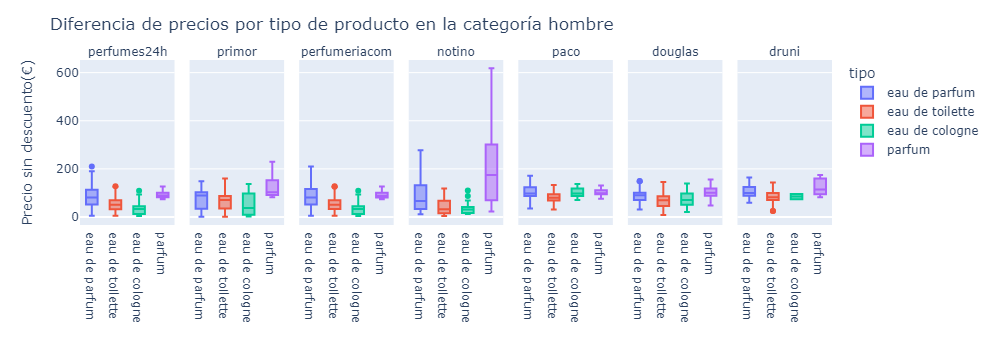

In [27]:
fig = px.box(data_frame=df_sin_outliers_masc, x="tipo", y="precio_sin_desc", color="tipo", facet_col="tienda")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("tienda=")[1]))
fig.update_layout(title="Diferencia de precios por tipo de producto en la categoría hombre", yaxis_title="Precio sin descuento(€)")
fig.update_xaxes(title_text='', showticklabels=True)

fig.show()

##### Para la categoría mujer:

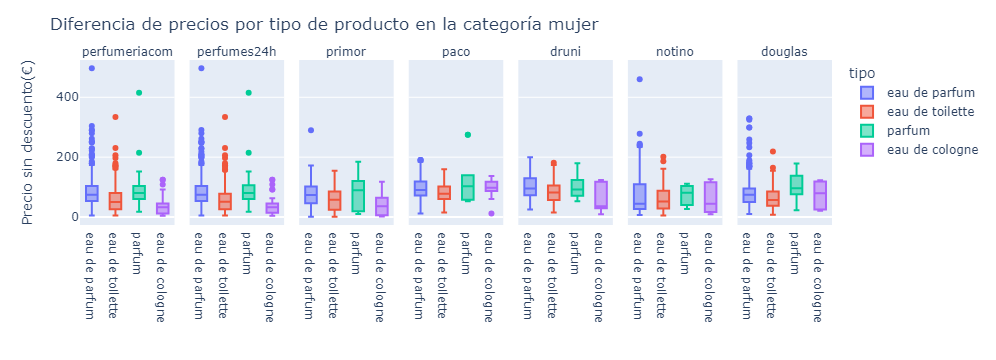

In [28]:
# Generamos un boxplot para cada tienda:
fig = px.box(data_frame=productos_mujeres, x="tipo", y="precio_sin_desc", color="tipo", facet_col="tienda")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("tienda=")[1]))
fig.update_layout(title="Diferencia de precios por tipo de producto en la categoría mujer", yaxis_title="Precio sin descuento(€)")
fig.update_xaxes(title_text='', showticklabels=True)

fig.show()

De igual manera que en el caso anterior eliminamos los outliers y visualizamos:

In [29]:
tiendas = productos_mujeres["tienda"].unique()
columna = "precio_sin_desc"
df_1 = elimina_outlier(productos_mujeres,tiendas[0], columna)
df_2 = elimina_outlier(productos_mujeres,tiendas[1], columna)
df_3 = elimina_outlier(productos_mujeres,tiendas[2], columna)
df_4 = elimina_outlier(productos_mujeres,tiendas[3], columna)
df_5 = elimina_outlier(productos_mujeres,tiendas[4], columna)
df_6 = elimina_outlier(productos_mujeres,tiendas[5], columna)
df_7 = elimina_outlier(productos_mujeres,tiendas[6], columna)
df_sin_outliers_fem = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], ignore_index=True)

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:21: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\regue\AppData\Local\Temp\ipykernel_3756\4252511893.py:21: UserWarning:

Boolean Series key will be reindexed to match Dat

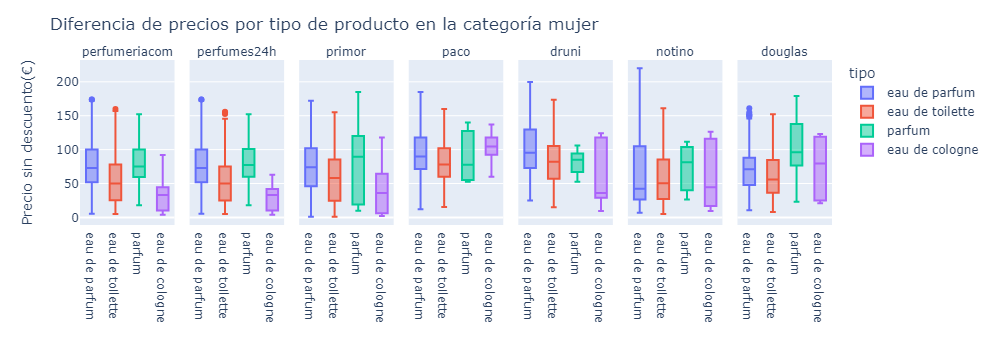

In [30]:
fig = px.box(data_frame=df_sin_outliers_fem, x="tipo", y="precio_sin_desc", color="tipo", facet_col="tienda")

fig.for_each_annotation(lambda a: a.update(text=a.text.split("tienda=")[1]))
fig.update_layout(title="Diferencia de precios por tipo de producto en la categoría mujer", yaxis_title="Precio sin descuento(€)")
fig.update_xaxes(title_text='', showticklabels=True)

fig.show()

De aquí podemos extraer la siguiente información acerca del precio por tipo de producto en cada tienda:<br>
<br>
Para la categoría Hombre:
- Eau de cologne: El precio más asequible lo encontramos en la tienda Notino, siendo de 31€ .
- Eau de toilette: El menor precio se encuentra en la tienda Notino, siendo este de 32€.
- Eau de parfum: El precio más bajo se encuentra en la tienda Notino, siendo de 67€.
- Parfum: El menor precio se encuentra en la tienda Perfumeria.com, siendo de 88€.<br>

Para la categoría Mujer:
- Eau de cologne: El precio más asequible lo encontramos en las tiendas Perfumes24h y Perfumeria.com, siendo de 33€.
- Eau de toilette: El menor precio se encuentra en las tiendas Perfumes24h y Perfumeria.com, siendo este de 50€.
- Eau de parfum: El precio más bajo se encuentra en la tienda Notino, siendo de 42€.
- Parfum: El menor precio se encuentra en la tienda Perfumeria.com, siendo de 75€.

Concluimos que en la tienda Notino por lo general el precio por tipo de producto en la categoría hombre es el menor. Sin embargo, para la categoría mujer, el menor precio lo encontramos en la tienda Perfumeria.com.

#### 2.2- Comparación del precio y descuento promedio de las marcas TOP 5 en cada una de las tiendas.

Notar que esta parte del estudio se dividirá por categoría ya que, como se pudo observar con anterioridad, el número de valoraciones de las marcas TOP 5 por género son mucho mayores en la población femenina y por tanto, si no separasemos por categoría, tendríamos un sesgo.<br>

Veamos con mayor claridad esta diferencia:

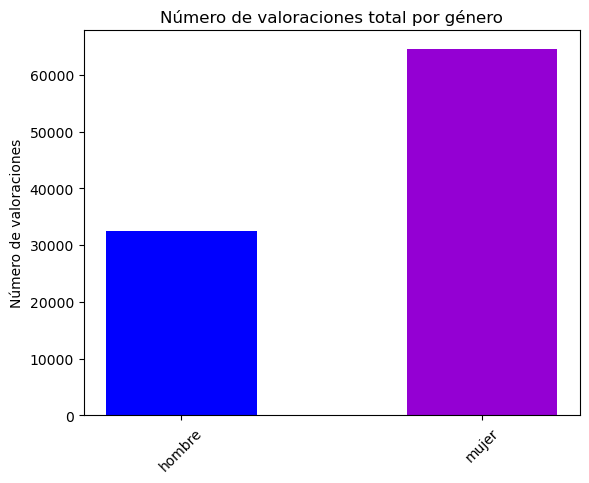

In [31]:
valoraciones_por_cat = df.groupby(['categoria'])['num_valoraciones'].sum().to_frame().reset_index()

# Definimos los colores para cada categoría:
colores_por_categoria = {'hombre': 'blue', 'mujer': 'darkviolet'}

# Generamos el gráfico de barras:
plt.figure(figsize=(6.4, 5))
for categoria, color in colores_por_categoria.items():
    subset = valoraciones_por_cat[valoraciones_por_cat['categoria'] == categoria]
    plt.bar(subset['categoria'], subset['num_valoraciones'], width=0.5, color=color)

plt.ylabel('Número de valoraciones')
plt.title('Número de valoraciones total por género')
plt.xticks(range(len(valoraciones_por_cat["categoria"].values)), valoraciones_por_cat["categoria"].values, rotation=45)
plt.show()

##### 2.2.1- Comparación del precio promedio de las marcas TOP 5 en cada una de las tiendas.

- Para la categoría de hombres:

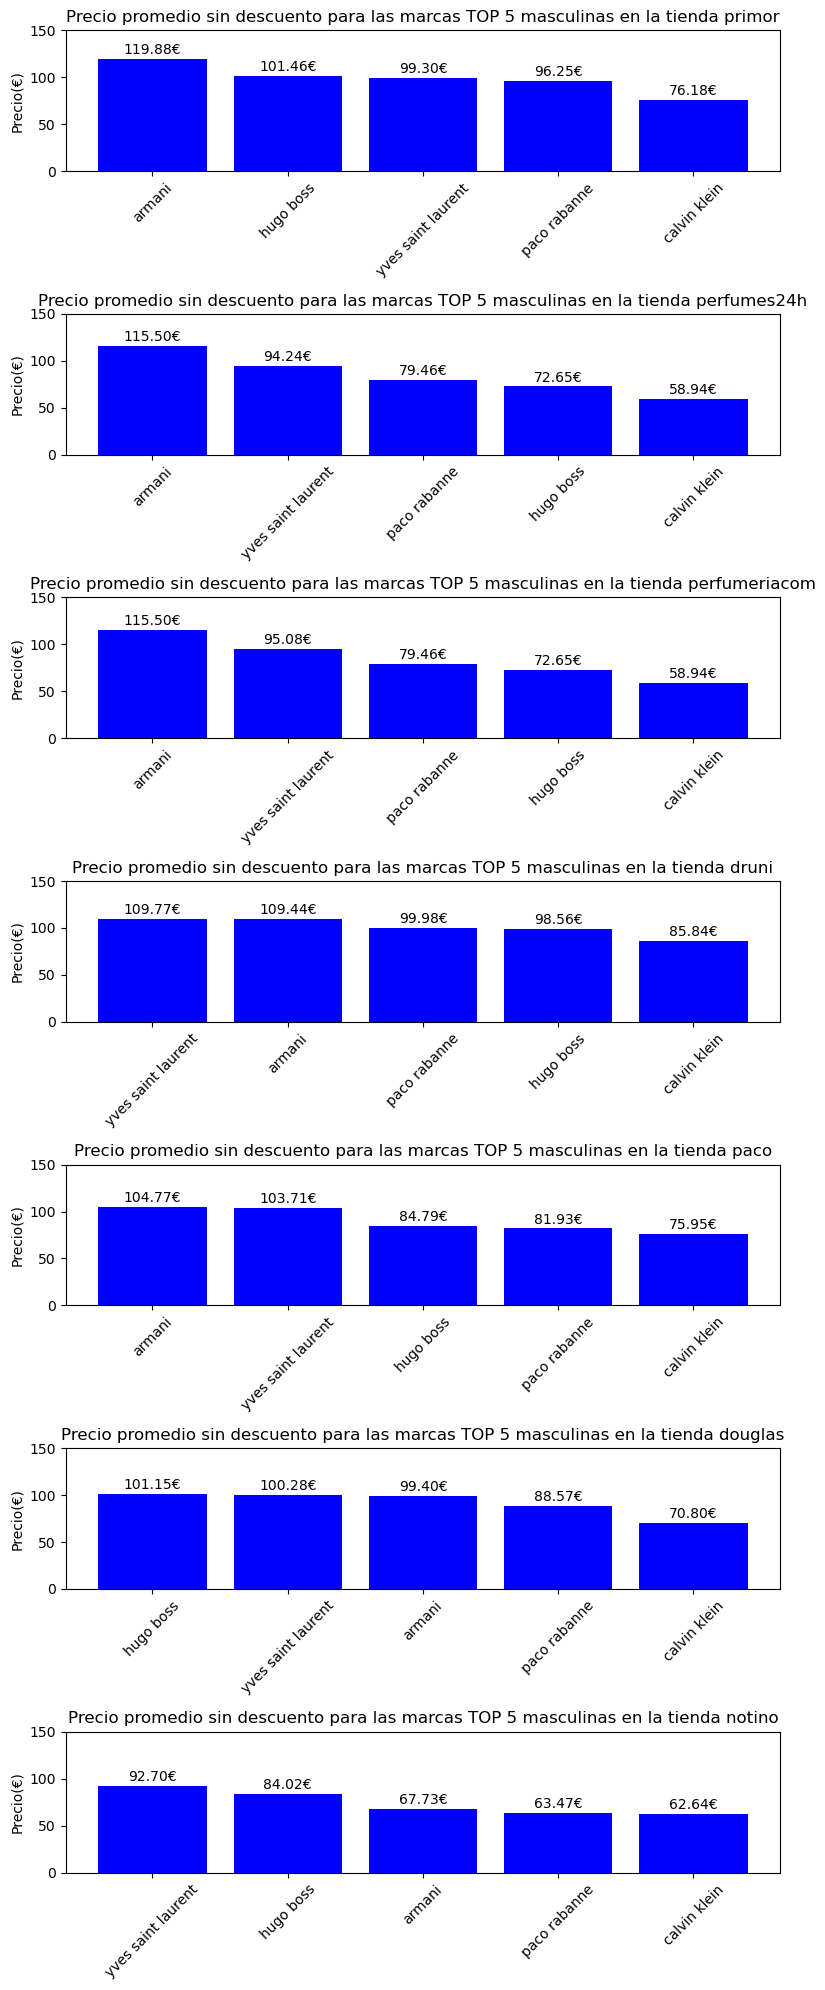

In [32]:
marcastop_masc = ((df["marca"] == "armani") | (df["marca"] == "yves saint laurent") | (df["marca"] == "calvin klein") | (df["marca"] == "hugo boss") | (df["marca"] == "paco rabanne")) & (df["categoria"] == "hombre")
precio_marcastop_masc = df[marcastop_masc].groupby(["tienda", "marca"])["precio_sin_desc"].mean().reset_index().sort_values(by=["precio_sin_desc", "tienda"], ascending= False)
precio_marcastop_masc["precio_sin_desc"] = precio_marcastop_masc["precio_sin_desc"].apply(lambda x: (round(x,2)))

fig, ax = plt.subplots(nrows=7, figsize=(8, 20))

tiendas = precio_marcastop_masc["tienda"].unique()

for i in range(7):
    mask_tienda = (precio_marcastop_masc["tienda"] == tiendas[i])
    ax[i].bar(precio_marcastop_masc[mask_tienda]["marca"], precio_marcastop_masc[mask_tienda]["precio_sin_desc"], color='blue')
    ax[i].set_ylabel('Precio(€)')
    ax[i].set_title(f'Precio promedio sin descuento para las marcas TOP 5 masculinas en la tienda {tiendas[i]}')
    ax[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(precio_marcastop_masc[mask_tienda]["precio_sin_desc"]):
        ax[i].text(j, v + 2, f'{v:.2f}€', ha='center', va='bottom', color='black')

for a in ax:
    a.set_ylim(top=150)

plt.tight_layout()
plt.show()

- Para la categoría de mujeres:

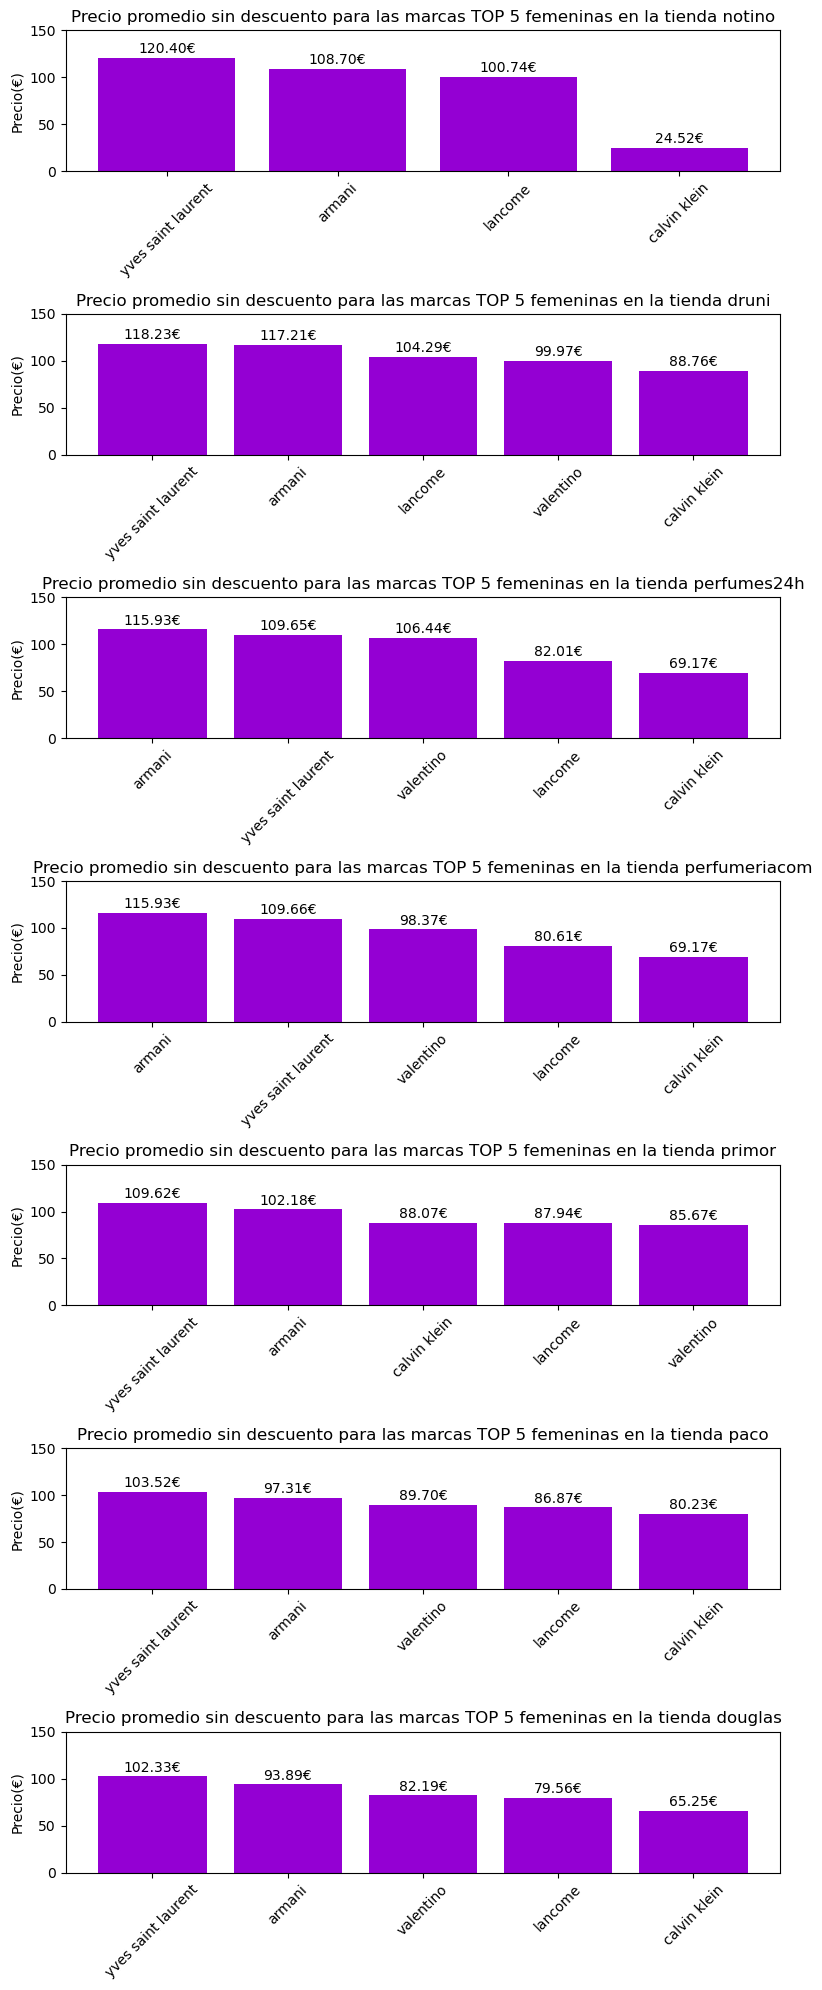

In [33]:
marcastop_fem = ((df["marca"] == "armani") | (df["marca"] == "yves saint laurent") | (df["marca"] == "calvin klein") | (df["marca"] == "lancome") | (df["marca"] == "valentino")) & (df["categoria"] == "mujer")
precio_marcastop_fem = df[marcastop_fem].groupby(["tienda", "marca"])["precio_sin_desc"].mean().reset_index().sort_values(by=["precio_sin_desc", "tienda"], ascending= False)
precio_marcastop_fem["precio_sin_desc"] = precio_marcastop_fem["precio_sin_desc"].apply(lambda x: (round(x,2)))

fig, ax = plt.subplots(nrows=7, figsize=(8, 20))

tiendas = precio_marcastop_fem["tienda"].unique()

for i in range(7):
    mask_tienda = (precio_marcastop_fem["tienda"] == tiendas[i])
    ax[i].bar(precio_marcastop_fem[mask_tienda]["marca"], precio_marcastop_fem[mask_tienda]["precio_sin_desc"], color='darkviolet')
    ax[i].set_ylabel('Precio(€)')
    ax[i].set_title(f'Precio promedio sin descuento para las marcas TOP 5 femeninas en la tienda {tiendas[i]}')
    ax[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(precio_marcastop_fem[mask_tienda]["precio_sin_desc"]):
        ax[i].text(j, v + 2, f'{v:.2f}€', ha='center', va='bottom', color='black')

for a in ax:
    a.set_ylim(top=150)

plt.tight_layout()
plt.show()

##### 2.2.2- Comparación del descuento promedio aplicado a las marcas TOP 5 en cada una de las tiendas:

Comencemos por tanto a estudiar los descuentos que aplica cada tienda a las marcas mas valoradas.

- Para la categoría de hombres:

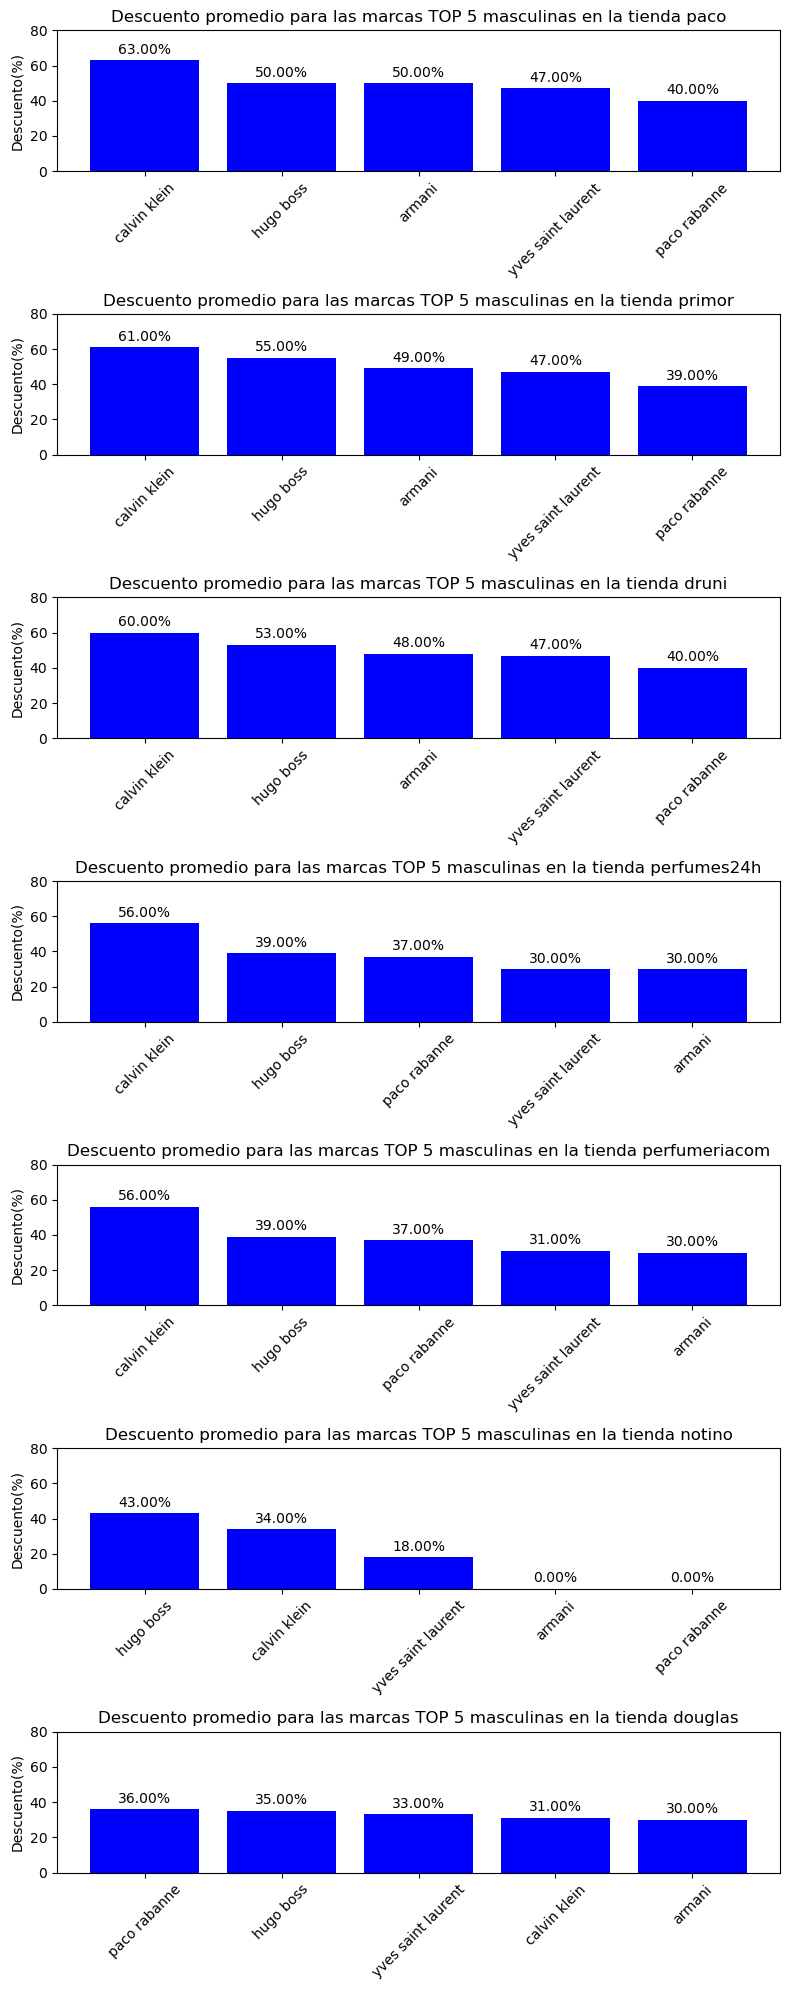

In [34]:
marcastop_masc = ((df["marca"] == "armani") | (df["marca"] == "yves saint laurent") | (df["marca"] == "calvin klein") | (df["marca"] == "hugo boss") | (df["marca"] == "paco rabanne")) & (df["categoria"] == "hombre")
descuento_marcastop_masc = df[marcastop_masc].groupby(["tienda", "marca"])["descuento"].mean().reset_index().sort_values(by=["descuento", "tienda"], ascending= False)
descuento_marcastop_masc["descuento"] = descuento_marcastop_masc["descuento"].apply(lambda x: (round(x)))

fig, ax = plt.subplots(nrows=7, figsize=(8, 20))

tiendas = descuento_marcastop_masc["tienda"].unique()

for i in range(7):
    mask_tienda = (descuento_marcastop_masc["tienda"] == tiendas[i])
    ax[i].bar(descuento_marcastop_masc[mask_tienda]["marca"], descuento_marcastop_masc[mask_tienda]["descuento"], color='blue')
    ax[i].set_ylabel('Descuento(%)')
    ax[i].set_title(f'Descuento promedio para las marcas TOP 5 masculinas en la tienda {tiendas[i]}')
    ax[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(descuento_marcastop_masc[mask_tienda]["descuento"]):
        ax[i].text(j, v + 2, f'{v:.2f}%', ha='center', va='bottom', color='black')

for a in ax:
    a.set_ylim(top=80)

plt.tight_layout()
plt.show()

Se observa que los mayores descuentos para las marcas TOP 5 masculinas se efectuan en las tiendas de Pacopefumerias y Primor.

- Para la categoría de mujeres:

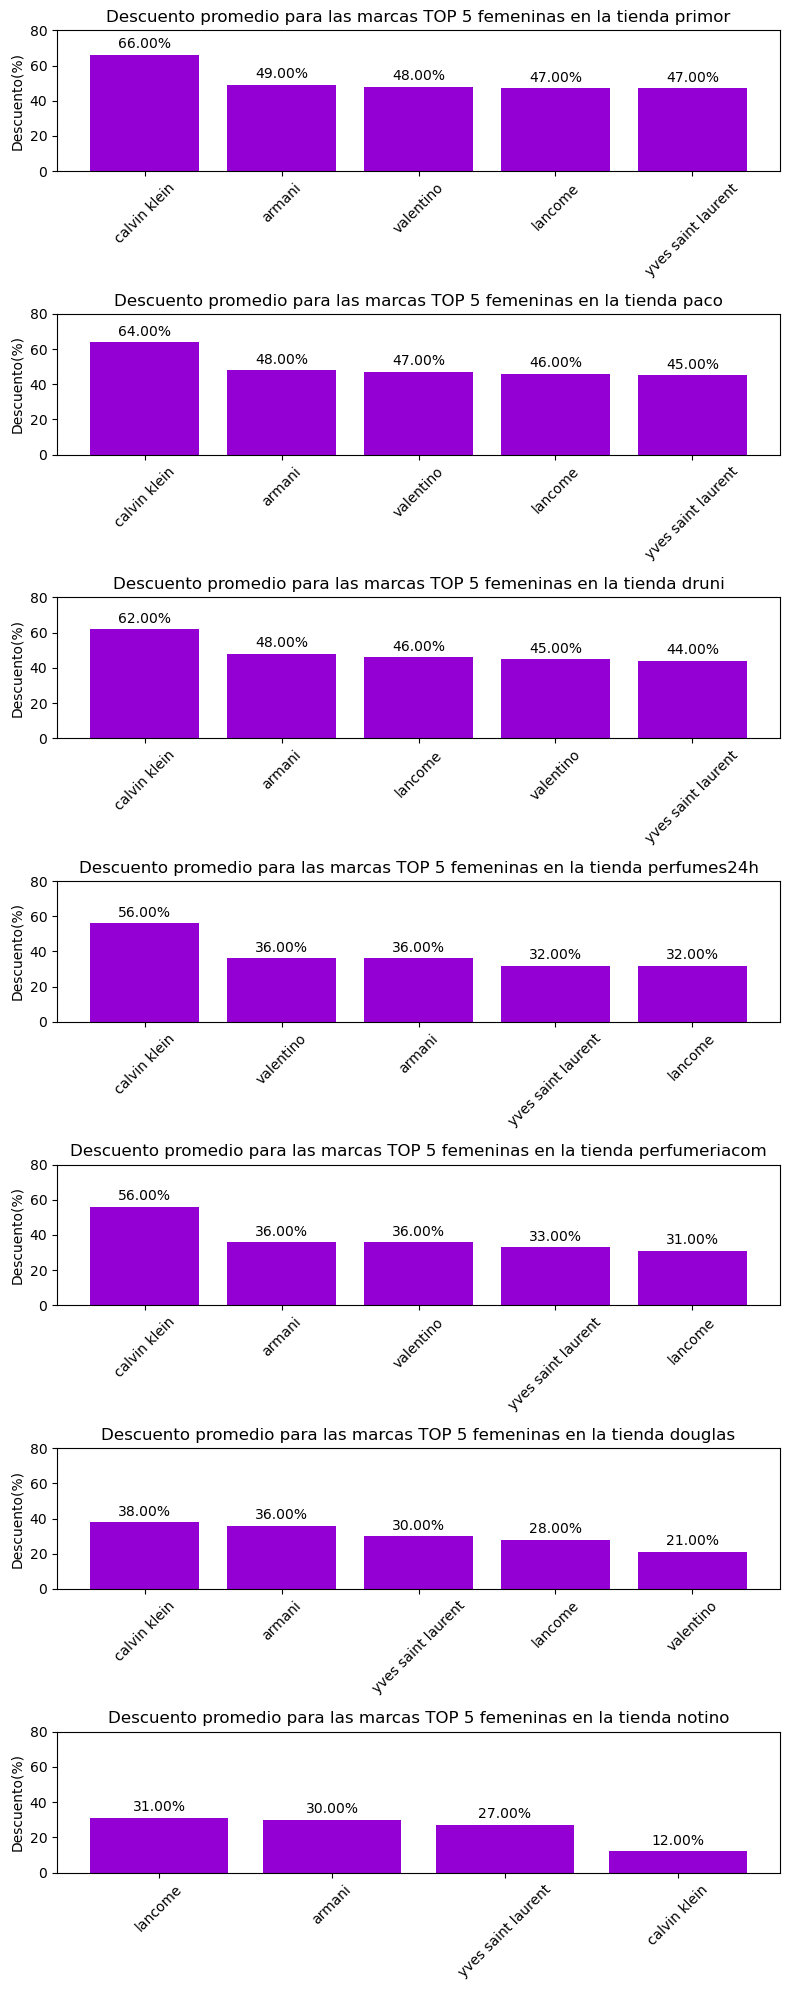

In [35]:
marcastop_fem = ((df["marca"] == "armani") | (df["marca"] == "yves saint laurent") | (df["marca"] == "calvin klein") | (df["marca"] == "lancome") | (df["marca"] == "valentino")) & (df["categoria"] == "mujer")
descuento_marcastop_fem = df[marcastop_fem].groupby(["tienda", "marca"])["descuento"].mean().reset_index().sort_values(by=["descuento", "tienda"], ascending= False)
descuento_marcastop_fem["descuento"] = descuento_marcastop_fem["descuento"].apply(lambda x: (round(x)))

fig, ax = plt.subplots(nrows=7, figsize=(8, 20))

tiendas = descuento_marcastop_fem["tienda"].unique()

for i in range(7):
    mask_tienda = (descuento_marcastop_fem["tienda"] == tiendas[i])
    ax[i].bar(descuento_marcastop_fem[mask_tienda]["marca"], descuento_marcastop_fem[mask_tienda]["descuento"], color='darkviolet')
    ax[i].set_ylabel('Descuento(%)')
    ax[i].set_title(f'Descuento promedio para las marcas TOP 5 femeninas en la tienda {tiendas[i]}')
    ax[i].tick_params(axis='x', rotation=45)
    for j, v in enumerate(descuento_marcastop_fem[mask_tienda]["descuento"]):
        ax[i].text(j, v + 2, f'{v:.2f}%', ha='center', va='bottom', color='black')

for a in ax:
    a.set_ylim(top=80)

plt.tight_layout()
plt.show()

Tras analizar los gráficos, los mejores descuentos en las marcas TOP 5 femeninas se observan en la tienda Primor con una clara diferencia.<br>

Podemos concluir a partir de las visualizaciones que la tienda con mayores descuentos tanto para hombre como para mujer es Primor.

#### 2.3- Determinación de la distribución de descuentos en la cantidad de productos para cada tienda.

Vamos a visualizar la distribución de los descuentos(mayores a 0%) aplicados en cada tienda y comparar su disponsión:

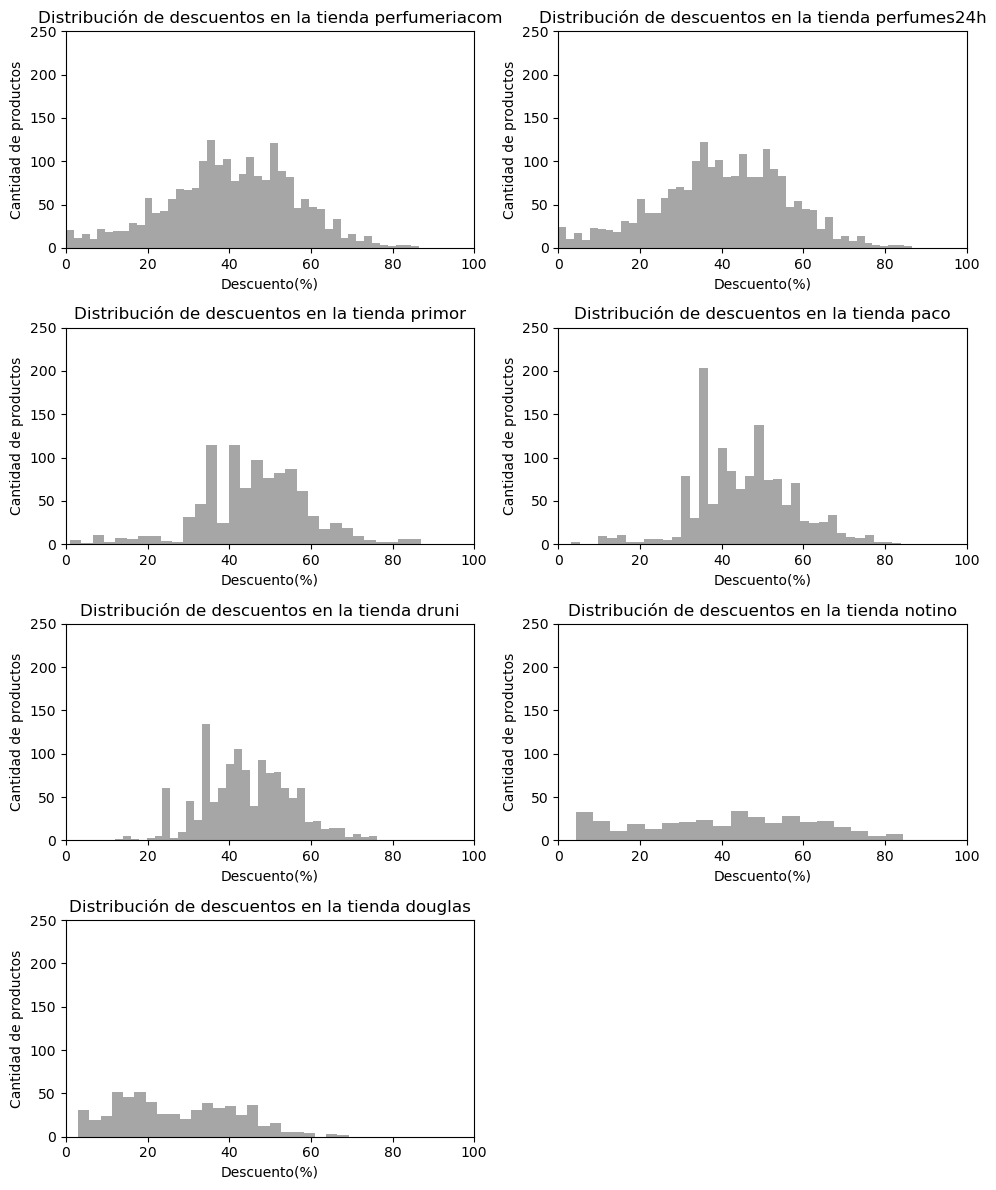

In [36]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
ax = ax.flatten()

tiendas = df["tienda"].unique()

for i in range(8):
    if i < len(tiendas):
        
        mask_tienda = (df["tienda"] == tiendas[i]) & (df["descuento"] > 0)
        distr_desc_tienda = df[mask_tienda]
        # Número de bins:
        num_bins = int(np.sqrt(len(distr_desc_tienda["descuento"])))

        ax[i].hist(distr_desc_tienda["descuento"], bins= num_bins, color= "grey", alpha=0.7)
        ax[i].set_xlim(0, 100)
        ax[i].set_xlabel('Descuento(%)')
        ax[i].set_ylabel("Cantidad de productos")
        ax[i].set_title(f"Distribución de descuentos en la tienda {tiendas[i]}")
    else:
        plt.delaxes(ax[i])

for a in ax:
    a.set_ylim(top=250)

plt.tight_layout()
plt.show()

Podemos observar como, a excepción de las tiendas Douglas y Notino, la distribución de los descuentos de las tiendas sigue aproximadamente una distribución gaussiana, notándose en las tiendas de Perfumes24h y Perfumeria.com una distribución asimétrica negativa, indicando un pequeño desplazamiento hacia porcentajes de descuento mayores.

#### 2.4- Análisis del número de valoraciones totales para cada tienda.

Veamos a continuación en que tiendas los clientes tienden a valorar más y en que tipo de producto:

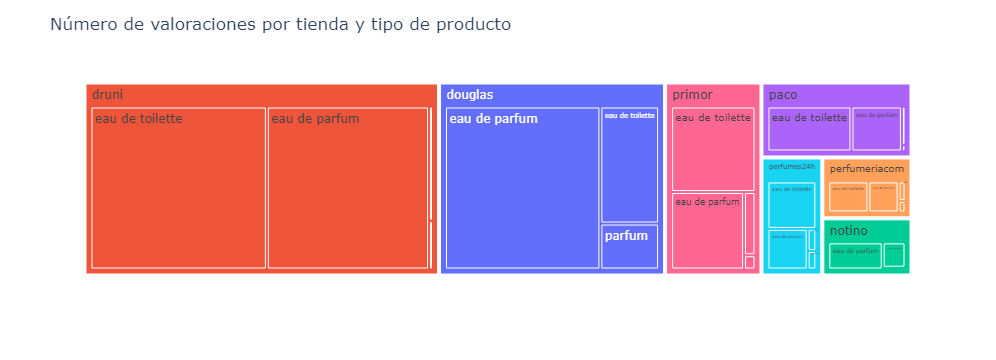

In [37]:
valoraciones_tienda = df.groupby(by=["tienda", "tipo"])["num_valoraciones"].sum().reset_index()

fig = px.treemap(data_frame = valoraciones_tienda, values = "num_valoraciones", path = ["tienda", "tipo"], color = "tienda")
fig.update_layout(title="Número de valoraciones por tienda y tipo de producto")

fig.show()

Con gran diferencia las dos tiendas con mayor número de valoraciones son Druni y Douglas. Cabe destacar como factor común entre las tiendas que los tipos con mayor número de valoraciones son: Eau de toilette y Eau de perfum, pudiendo concluir que estos parecen ser los productos más demandados.

### 3- Análisis de las marcas TOP 5.

#### 3.1- Comparación de la cantidad de productos en las marcas TOP 5.
Veamos la cantidad de productos para cada una de las marcas TOP 5 y tratemos de determinar si ofrecen una gran variedad de productos o, se centran en unos pocos productos estrella:

- Para la categoría hombre tenemos:

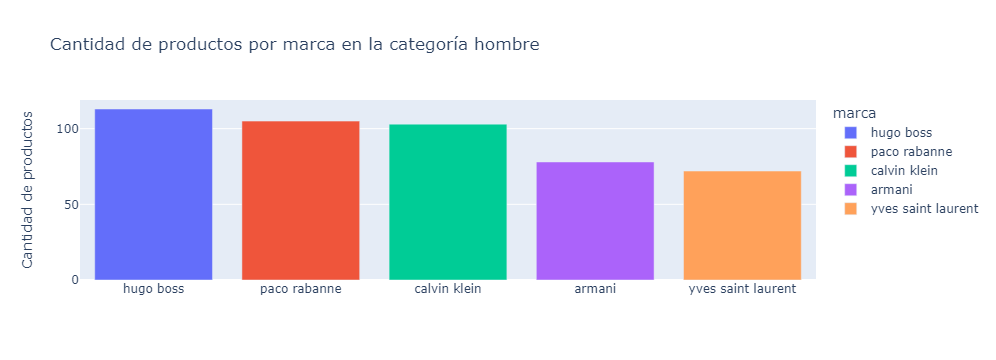

In [38]:
cantidad_prod_masc = df[marcastop_masc].groupby(by= "marca")["nombre"].count().sort_values(ascending= False).reset_index()

labels_3_h = {'nombre': 'Cantidad de productos'}
titulo_3_h = 'Cantidad de productos por marca en la categoría hombre'

fig_2 = px.bar(data_frame = cantidad_prod_masc, x = "marca", y = "nombre", color = "marca", labels= labels_3_h, title= titulo_3_h)
fig_2.update_xaxes(title_text='', showticklabels= True)

Si comparamos con la gráfica anteriormente obtenida de las marcas más valoradas:

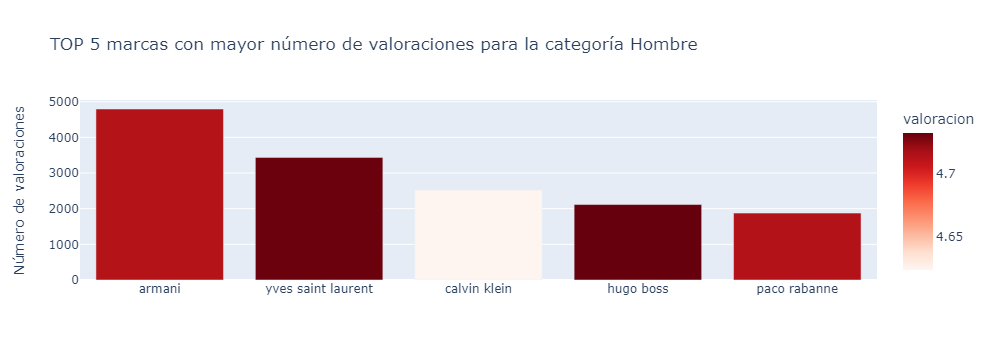

In [39]:
px.bar(data_frame= df_top5_masc, x= "marca", y= "num_valoraciones", color= "valoracion", color_continuous_scale= "reds", labels= labels_14_h, title= titulo_14_h)

Observamos como las marcas con mayor número de valoraciones parecen tener un menor número de productos, quizá más selectos.

- Para la categoría mujer tenemos:

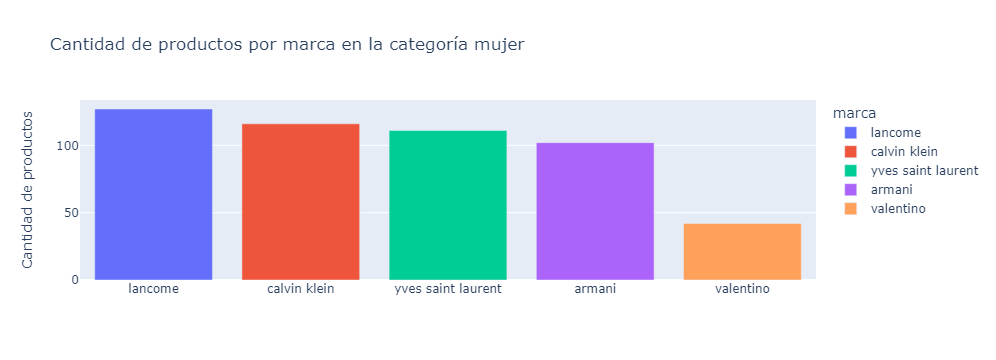

In [40]:
cantidad_prod_fem = df[marcastop_fem].groupby(by= "marca")["nombre"].count().sort_values(ascending= False).reset_index()

labels_3_m = {'nombre': 'Cantidad de productos'}
titulo_3_m = 'Cantidad de productos por marca en la categoría mujer'

fig_2 = px.bar(data_frame = cantidad_prod_fem, x = "marca", y = "nombre", color = "marca", labels= labels_3_m, title= titulo_3_m)
fig_2.update_xaxes(title_text='', showticklabels= True)

Comparemos con la gráfica del mayor número de valoraciones:

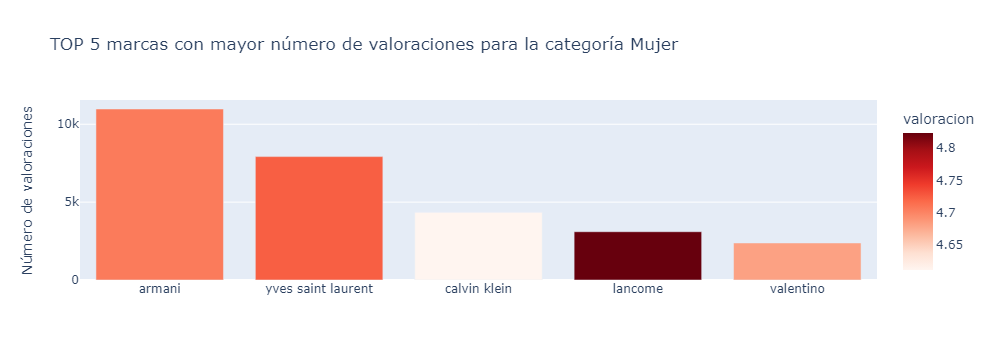

In [41]:
px.bar(data_frame= df_top5_fem, x= "marca", y= "num_valoraciones", color= "valoracion", color_continuous_scale= "reds", labels= labels_14_m, title= titulo_14_m)

#### 3.2- Estudio de posibles correlaciones en el precio, descuento y valoraciones en las marcas TOP 5.

- Para la categoría hombre tenemos:

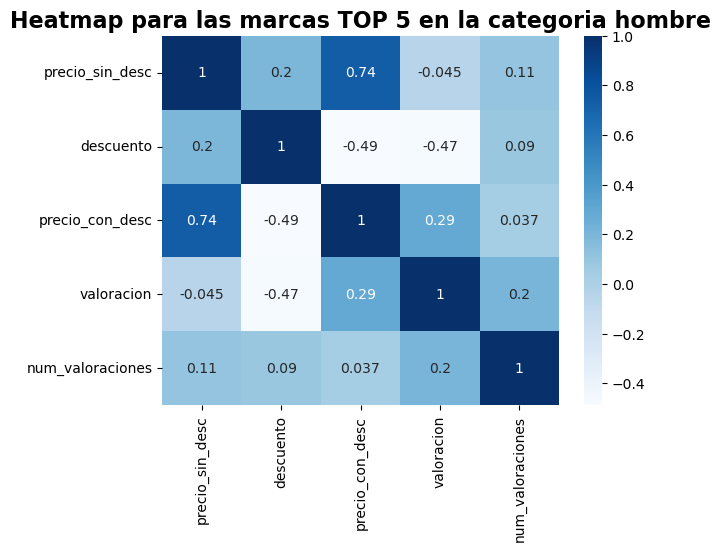

In [42]:
mask_top_prod_masc = ((df["nombre"] == "acqua di gio") | (df["nombre"] == "y") | (df["nombre"] == "boss bottled")) & (df["categoria"] == "hombre")
matrix_H = df[mask_top_prod_masc].corr(numeric_only=True)

sns.heatmap(matrix_H, annot = True, cmap = "Blues")
plt.title("Heatmap para las marcas TOP 5 en la categoria hombre", fontsize=16, fontweight='bold');

Tras visualizar el gráfico podemos observar:<br>
<ol>
  <li>Existe una leve correlación negativa entre la valoración y el descuento. Esto se traduce en que una mayor valoración disminuye el descuento.</li>
  <li>Observamos una pequeña correlación positiva entre el precio con descuento y la valoración, es decir, parece que se valora con mayor puntuación si el precio es con descuento.</li>
</ol>

Obviamente estas son observaciones cualitativas ya que no se puede suponer, con los datos obtenidos, tal relación entre estas variables.

- Para la categoría mujer tenemos:

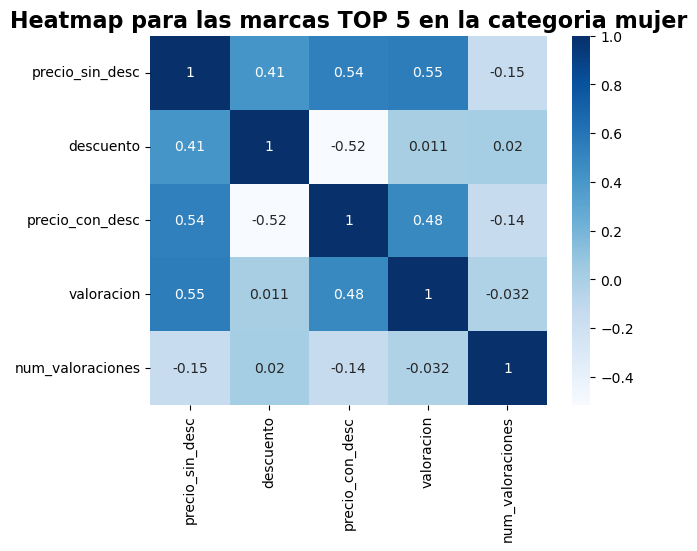

In [43]:
mask_top_prod_fem = ((df["nombre"] == "my way") | (df["nombre"] == "libre") | (df["nombre"] == "born in roma donna")) & (df["categoria"] == "mujer")
matrix_F = df[mask_top_prod_fem].corr(numeric_only=True)

sns.heatmap(matrix_F, annot = True, cmap = "Blues")
plt.title("Heatmap para las marcas TOP 5 en la categoria mujer", fontsize=16, fontweight='bold');

En este caso se presentan ciertas diferencias con respecto a la categoría hombre:<br>
<ol>
  <li>En este caso existe una correlación positiva entre la valoración y el precio sin descuento. Esto se traduce en que el precio sin descuento tenderá a aumentar si la valoración es mayor.</li>
  <li>Al igual que en el caso anterior observamos una correlación positiva entre el precio con descuento y la valoración.</li>
</ol>

#### Destacar que estas observaciones, en ambas categorías, son cualitativas ya que no se puede suponer, con los datos obtenidos, tal relación entre estas variables.

### 4- Conclusiones.

Tras la información recabada podemos destacar lo que sigue:

- La orientación de mercado se dirije hacia el público femenino.
- El precio promedio de los productos es mayor para la categoría hombre.
- No hay diferencias apreciables en descuentos por categoría.
- Las tres marcas con mayor número de valoraciones, de mayor a menor, son las mismas en ambas categorías, siendo estas:<br>
<ol>
  <li>Armani</li>
  <li>Yves Saint Laurent</li>
  <li>Calvin Klein</li>
</ol>
- La marca con mayor valoración en la categoría hombre es Hugo Boss.
- La marca con mayor valoración en la categoría mujer es Lancome.
- La categoría mujer tiende a realizar más valoraciones en los productos.
- La tienda con mayores descuentos para las marcas TOP es Primor en ambas categorías.
- Las tiendas con más cantidad de valoraciones son Druni, Douglas y Primor.
- La tienda con menores precios , sin descuento por tipo, es Notino para la categoría hombre y Perfumeria.com para la categoría mujer.
- No se encuentra una clara correlación entre precios, descuentos y valoraciones de las marcas TOP 5.

# Anexo.

Se han construido las siguientes funciones para la busqueda de marcas y productos en tienda:

### Buscador de marca mas barata en tiendas

In [44]:
def tienda_mas_barata_para_marca():
    
    marca = (input("Introduce la marca: ")).lower()

    df_marca = df[df['marca'] == marca]
    
    if df_marca.empty:
        return f"No hay productos de {marca} en la base de datos."
    
    fila_menor_precio = df_marca[df_marca['precio_con_desc'] == df_marca['precio_con_desc'].min()]
    
    tienda_mas_barata = fila_menor_precio['tienda'].values[0]
    
    menor_precio = fila_menor_precio['precio_con_desc'].values[0]
    
    return f"La tienda mas barata para {marca} es la tienda {tienda_mas_barata} desde {menor_precio}€"

- Ejecuta para iniciar la busqueda:

In [45]:
tienda_mas_barata_para_marca()

Introduce la marca:  hugo boss


'La tienda mas barata para hugo boss es la tienda perfumeriacom desde 24.98€'

### Buscador de producto mas barata en tiendas

In [46]:
def tienda_mas_barata_para_nombre():
    
    nombre = (input("Introduce el nombre del produto: ")).lower()
    
    df_nombre = df[df['nombre'] == nombre]
    
    if df_nombre.empty:
        return f"No hay productos de {nombre} en la base de datos."
    
    fila_menor_precio = df_nombre[df_nombre['precio_con_desc'] == df_nombre['precio_con_desc'].min()]
    
    tienda_mas_barata = fila_menor_precio['tienda'].values[0]
    
    menor_precio = fila_menor_precio['precio_con_desc'].values[0]
    
    return f"La tienda mas barata para {nombre} es la tienda {tienda_mas_barata} por {menor_precio}€"

- Ejecuta para iniciar la busqueda:

In [47]:
tienda_mas_barata_para_nombre()

Introduce el nombre del produto:  si


'La tienda mas barata para si es la tienda paco por 37.72€'

### Comparador de producto en tiendas:

In [48]:
def mostrar_nombres_de_marca():
    
    marca = (input("Introduce la marca a buscar: ")).lower()
    
    nombres_unicos = df[df['marca'] == marca]['nombre'].unique()

    if len(nombres_unicos) == 0:
        
        print(f"No hay productos de {marca} en la base de datos.")
        return

    print(f"Productos de {marca}:")
    for i, nombre in enumerate(nombres_unicos):
        
        print(f"{i + 1}. {nombre}")

    while True:
        try:
            seleccion = int(input("Selecciona un producto por su numero (0 para salir): "))
            if seleccion == 0:
                break
                
            elif 1 <= seleccion <= len(nombres_unicos):
                nombre_seleccionado = nombres_unicos[seleccion - 1]
                tiendas_y_precios = df[(df['marca'] == marca) & (df['nombre'] == nombre_seleccionado)][['tienda', 'precio_con_desc']]
                
                print(f"\nTiendas y precios para {nombre_seleccionado} de {marca}:\n")
                print(f"{tiendas_y_precios.to_string(index=False)}\n")
                
            else:
                print("Introduce un número válido.")
                
        except ValueError:
            print("Entrada no valida. Introduce un número valido.")

- Ejecuta para iniciar la busqueda:

In [49]:
mostrar_nombres_de_marca()

Introduce la marca a buscar:  armani


Productos de armani:
1. si
2. si passione
3. armani code for women
4. emporio stronger with you absolutely
5. stronger with you
6. my way intense
7. acqua di gio
8. s you
9. emporio armani for him
10. emporio armani
11. perfume mujer acqua di gioia eau de
12. acqua di gioia
13. my way
14. emporio armani mujer
15. acqua di gio hombre
16. acqua di gio parfum
17. armani diamonds
18. stronger with you intensely
19. stronger with you only
20. recarga si intense
21. acqua di gio parfum refill
22. el
23. emporio armani for her
24. ocean di gioia
25. si passione intense
26. recarga my way florale ep 150ml
27. si passione eclat
28. terra di gioia
29. my way intense refill
30. diamonds for men
31. recharge
32. armani prive oud royal
33. si intense eau de  recargable
34. my way floral
35. code
36. armani code new
37. estuche acqua di gioa
38. si parfum intense
39. si passione eclat eau de
40. eaux homme
41. code femme
42. cofre armani code new
43. eau homme
44. my way florale recargable ep
45. st

Selecciona un producto por su numero (0 para salir):  7



Tiendas y precios para acqua di gio de armani:

       tienda  precio_con_desc
      douglas            40.99
perfumeriacom            24.95
  perfumes24h            24.95
         paco            59.80
  perfumes24h            69.95
        druni            59.95
      douglas            68.99
      douglas            76.99
perfumeriacom            69.95
       primor            65.55
        druni            38.95
      douglas            85.99



Selecciona un producto por su numero (0 para salir):  0
